In [1]:
import pandas as pd
from pathlib import Path
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [2]:
filepath = Path("Downloads/Cleaned_Genre_Studio_Data.csv")
df = pd.read_csv(filepath)

In [3]:
df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18939 non-null  int64  
 1   uid         18939 non-null  int64  
 2   Name        18939 non-null  object 
 3   genre       18860 non-null  object 
 4   episodes    18411 non-null  float64
 5   members     18939 non-null  int64  
 6   popularity  18939 non-null  int64  
 7   ranked      15963 non-null  float64
 8   score       18596 non-null  float64
 9   Type        2815 non-null   object 
 10  Studio      2815 non-null   object 
 11  Start Date  18939 non-null  object 
 12  End Date    9696 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [5]:
df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [6]:
df.groupby("Studio")["score"].mean()

Studio
8bit                              7.814167
A-1 Pictures                      7.977500
A.C.G.T.                          7.944000
AIC                               7.589231
AIC ASTA                          7.776364
AIC Classic                       7.753333
AIC Spirits                       7.856667
APPP                              7.925000
Actas                             7.900000
Ajia-Do                           7.970000
Anpro                             7.930000
Arms                              7.763333
Artland                           8.362857
B&T                               7.690000
B.CMAY PICTURES                   8.300000
Bandai Namco Pictures             8.382632
Bee Media                         7.840000
Bee Train                         7.908333
Bones                             8.078404
Brain's Base                      8.111304
Bridge                            7.668000
C-Station                         8.073333
C2C                               7.620000
Clov

In [7]:
df.columns

Index(['Unnamed: 0', 'uid', 'Name', 'genre', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'Type', 'Studio', 'Start Date',
       'End Date'],
      dtype='object')

In [8]:
cols = [ 'Name','score','Type','Studio',]
df2 = df.loc[:,cols]

In [9]:
df2.head()

,Name,score,Type,Studio
0,Haikyuu!! Second Season,8.82,TV,Production I.G
1,Shigatsu wa Kimi no Uso,8.83,TV,A-1 Pictures
2,Made in Abyss,8.83,TV,Kinema Citrus
3,Fullmetal Alchemist: Brotherhood,9.23,TV,Bones
4,Kizumonogatari III: Reiketsu-hen,8.83,Movie,Shaft


In [10]:
mask = (df2.score > 7) & (df2.Type == "TV")
studio = df2.loc[mask]

In [11]:
charts = studio.groupby("Studio")["score"].size().reset_index()

In [12]:
charts.head(15)

,Studio,score
0,8bit,8
1,A-1 Pictures,74
2,A.C.G.T.,5
3,AIC,5
4,AIC ASTA,8
5,AIC Classic,2
6,AIC Spirits,1
7,Actas,2
8,Ajia-Do,4
9,Arms,3


In [13]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Studio  108 non-null    object
 1   score   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [14]:
charts = charts.rename(columns = {"score":"anime"})

In [15]:
charts_sub = charts.sort_values(by = "anime", ascending = False).head(15).sort_values(by = "anime", ascending = True)

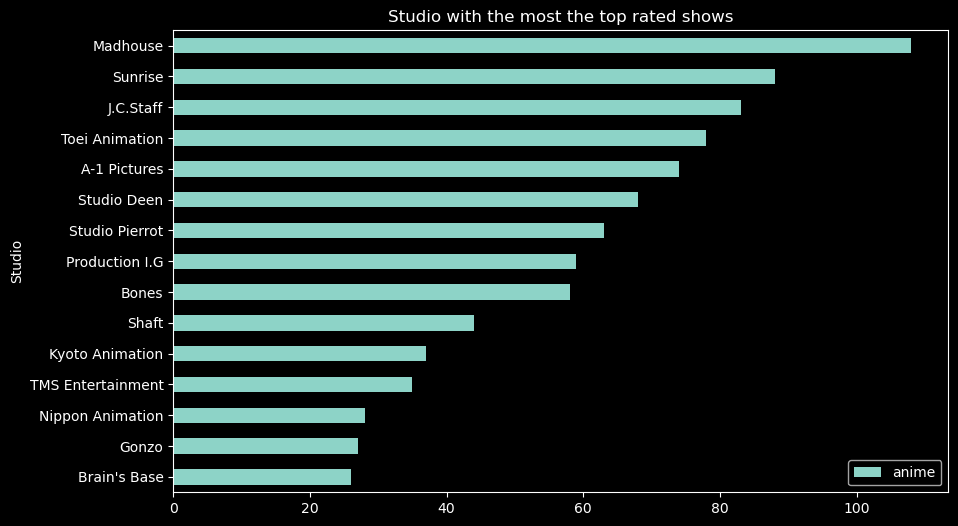

In [43]:
charts_sub.plot(kind = "barh", figsize =(10,6), x = "Studio", y ="anime")

plt.title("Studio with the most the top rated shows")
plt.show()

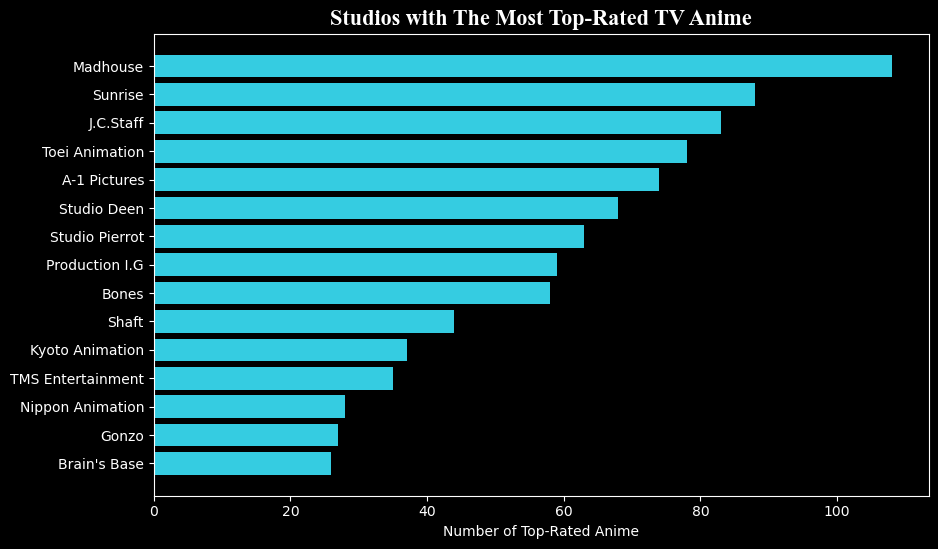

In [45]:
plt.figure(figsize = (10,6))
plt.style.use("dark_background")
plt.barh(charts_sub.Studio,charts_sub.anime,color = "#3ce3fb", alpha = 0.9)
plt.title("Studios with The Most Top-Rated TV Anime", fontsize =16, fontweight ="bold", fontfamily = "Times New Roman")
plt.xlabel("Number of Top-Rated Anime")
plt.show()


In [20]:
df.head()

,Unnamed: 0,uid,Name,genre,episodes,members,popularity,ranked,score,Type,Studio,Start Date,End Date
0,0,28891,Haikyuu!! Second Season,Comedy,25.0,489888,141,25.0,8.82,TV,Production I.G,"Oct 4, 2015","Mar 27, 2016"
1,1,23273,Shigatsu wa Kimi no Uso,Drama,22.0,995473,28,24.0,8.83,TV,A-1 Pictures,"Oct 10, 2014","Mar 20, 2015"
2,2,34599,Made in Abyss,Sci-Fi,13.0,581663,98,23.0,8.83,TV,Kinema Citrus,"Jul 7, 2017","Sep 29, 2017"
3,3,5114,Fullmetal Alchemist: Brotherhood,Action,64.0,1615084,4,1.0,9.23,TV,Bones,"Apr 5, 2009","Jul 4, 2010"
4,4,31758,Kizumonogatari III: Reiketsu-hen,Action,1.0,214621,502,22.0,8.83,Movie,Shaft,"Jan 6, 2017",NaN


In [71]:
sub = df.loc[(df.Studio.isin(["Madhouse", "Sunrise","J.C.Staff", "Toei Animation","A-1 Pictures"])) & (df.genre.isin(["Comedy","Slice of Life", "Action","Adventure","Fantasy"]))]

sub2 = sub.groupby(["genre","Studio"] ).size().reset_index()

sub2.columns = ["genre", "Studio", "Count"]


<Axes: xlabel='genre', ylabel='Count'>

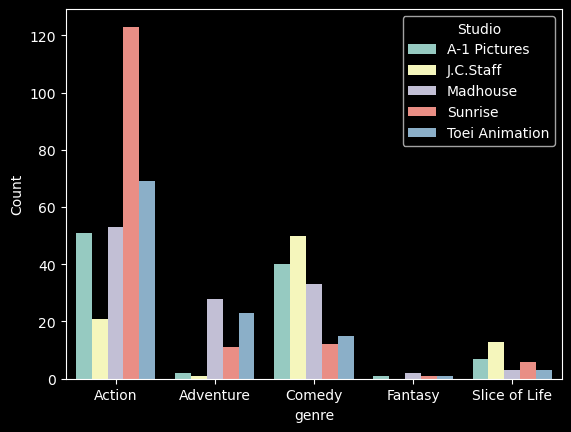

In [72]:

sns.barplot(data = sub2, x = "genre", y = "Count", hue = "Studio" )